In [13]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/heart.csv')
data.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 15
0,NaN,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,NaN
1,NaN,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,NaN
2,NaN,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,NaN
3,NaN,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,NaN
4,NaN,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,NaN


In [14]:
print("(Rows, columns): " + str(data.shape))
data.columns

(Rows, columns): (303, 16)


Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'Unnamed: 15'],
      dtype='object')

In [15]:
data.nunique(axis=0)

Unnamed: 0       0
age             41
sex              2
cp               4
trestbps        49
chol           152
fbs              2
restecg          3
thalach         91
exang            2
oldpeak         40
slope            3
ca               5
thal             4
target           2
Unnamed: 15      0
dtype: int64

In [16]:
data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 15
count,0.0,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,0.0
mean,NaN,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,NaN
std,NaN,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,NaN
min,NaN,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,NaN
50%,NaN,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,NaN
75%,NaN,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,NaN
max,NaN,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,NaN


In [17]:
print(data.isna().sum())

Unnamed: 0     303
age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
target           0
Unnamed: 15    303
dtype: int64


In [18]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [20]:
data=data.drop(labels='Unnamed',axis=1)

KeyError: ignored

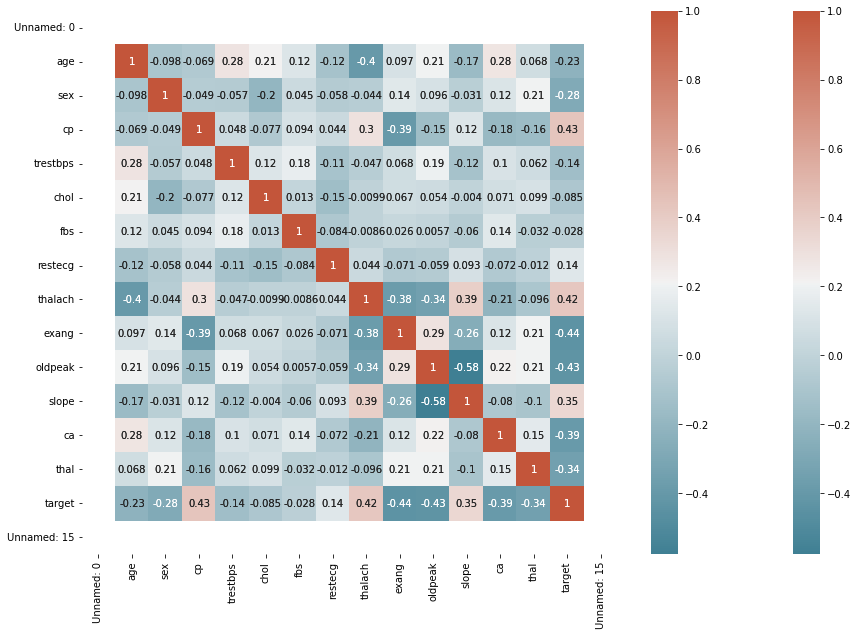

In [21]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

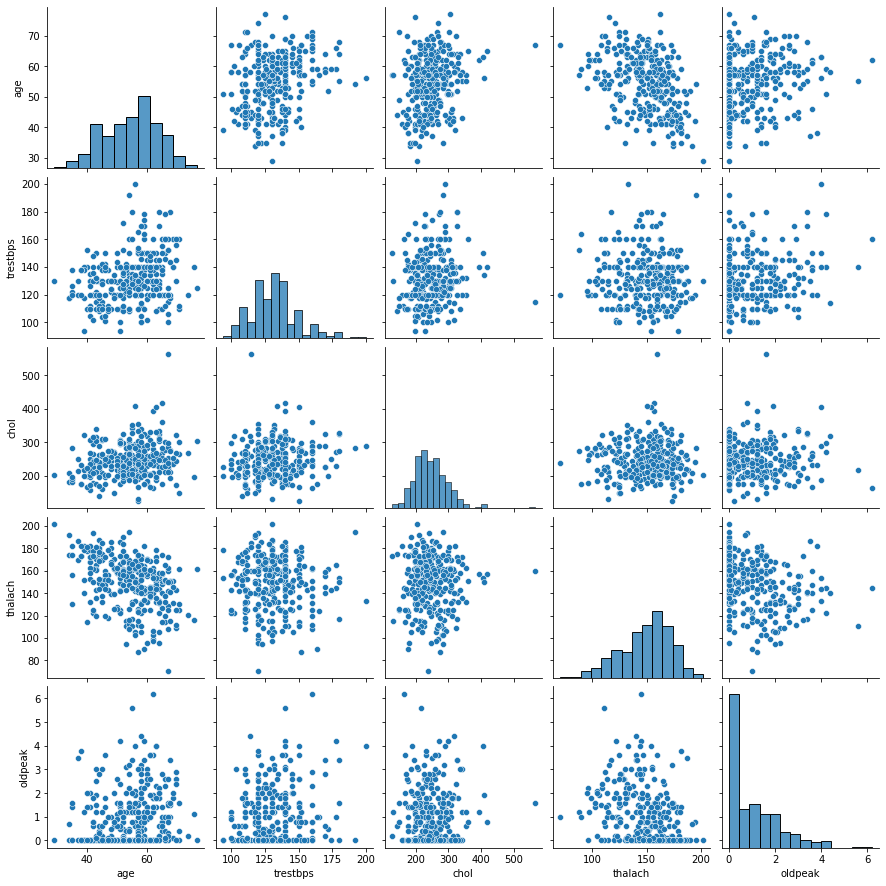

In [22]:
subData = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)


Text(26.426458333333343, 0.5, 'ST depression')

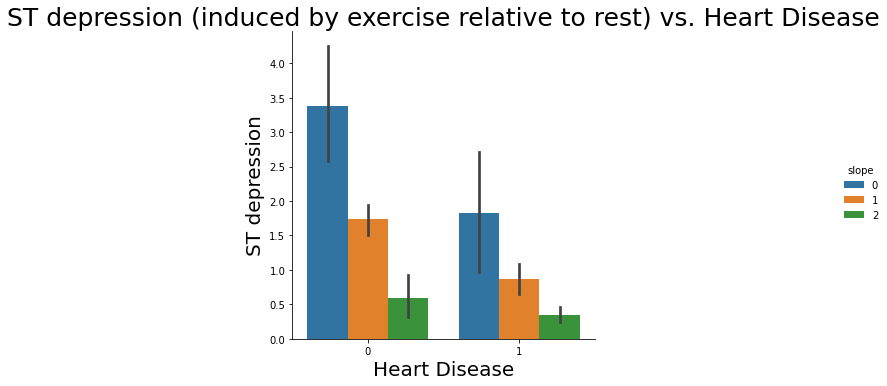

In [23]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

Text(0, 0.5, 'Thalach Level')

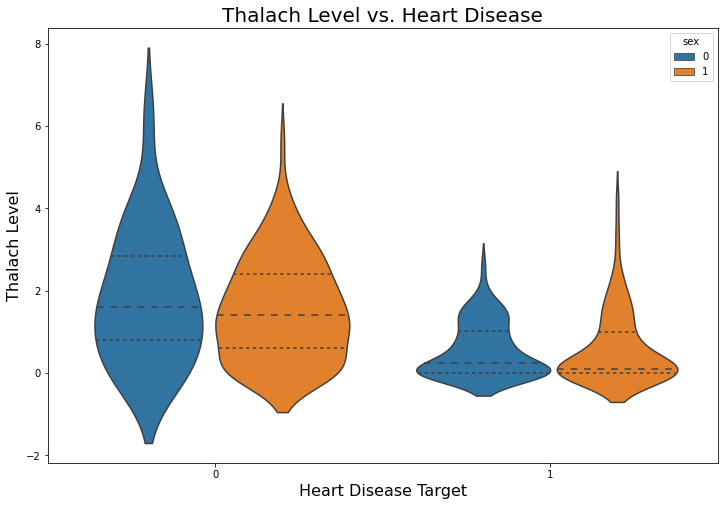

In [24]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= data )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

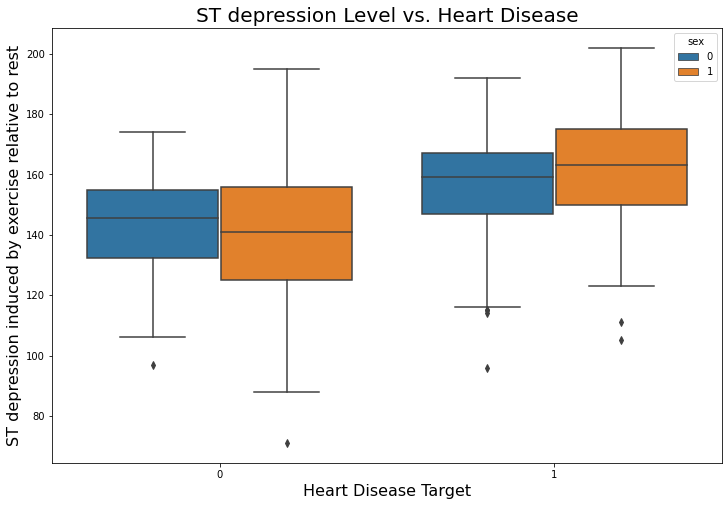

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=data )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

In [31]:
# Filtering data by POSITIVE Heart Disease patient
pos_data = data[data['target']==1]
pos_data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 15
count,0.0,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,0.0
mean,NaN,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0,NaN
std,NaN,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0,NaN
min,NaN,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN
25%,NaN,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,NaN
50%,NaN,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0,NaN
75%,NaN,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0,NaN
max,NaN,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0,NaN


In [32]:
# Filtering data by NEGATIVE Heart Disease patient
neg_data = data[data['target']==0]
neg_data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 15
count,0.0,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0,0.0
mean,NaN,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0,NaN
std,NaN,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0,NaN
min,NaN,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
25%,NaN,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0,NaN
50%,NaN,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0,NaN
75%,NaN,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0,NaN
max,NaN,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0,NaN


In [33]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 0.583030303030303
(Negative Patients ST depression): 1.5855072463768116


In [34]:
print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))

(Positive Patients thalach): 158.46666666666667
(Negative Patients thalach): 139.1014492753623
